In [88]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.regularizers import l2

In [89]:
df=pd.read_csv("Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [90]:
df=df.drop(columns=['RowNumber','CustomerId','Surname'])

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [92]:
df.duplicated().sum()

0

In [93]:
df.isna().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [94]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [95]:
df['Card Type'].value_counts()

Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

In [96]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [119]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label=OneHotEncoder()

In [120]:
for col,i in df.dtypes.items():
    if i=='object':
        df[col]=label.fit_transform(df[col])

In [99]:
x=df.drop(columns=['Exited'])
y=df['Exited']

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [101]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [102]:
model = Sequential()
model.add(Dense(64, activation='relu',kernel_regularizer=l2(0.001), input_shape=(x_train_scaled.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [103]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                960       
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 32)               

In [104]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [105]:
from tensorflow.keras.callbacks import EarlyStopping
callback=EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='auto',
    restore_best_weights=True
    
)

In [106]:
history=model.fit(x_train_scaled,y_train,epochs=100,validation_data=(x_test_scaled,y_test),callbacks=callback)

Epoch 1/100
250/250 [==============================] - 3s 4ms/step - loss: 0.2681 - accuracy: 0.9254 - val_loss: 0.0867 - val_accuracy: 0.9990
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.0851 - accuracy: 0.9975 - val_loss: 0.0613 - val_accuracy: 0.9990
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0712 - accuracy: 0.9979 - val_loss: 0.0530 - val_accuracy: 0.9990
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0586 - accuracy: 0.9981 - val_loss: 0.0454 - val_accuracy: 0.9990
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0511 - accuracy: 0.9970 - val_loss: 0.0401 - val_accuracy: 0.9990
Epoch 6/100
250/250 [==============================] - 1s 5ms/step - loss: 0.0450 - accuracy: 0.9979 - val_loss: 0.0351 - val_accuracy: 0.9990
Epoch 7/100
250/250 [==============================] - 1s 5ms/step - loss: 0.0386 - accuracy: 0.9977 - val_loss: 0.0309 - val_accuracy: 0.9990

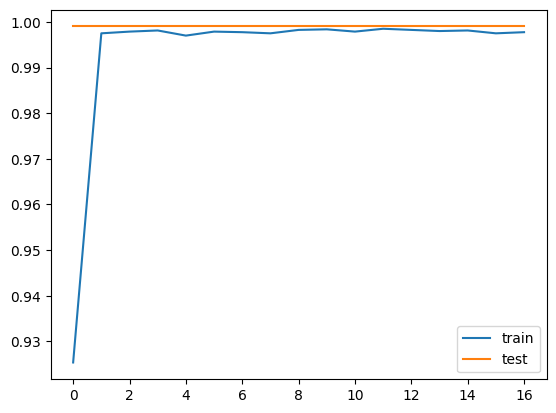

In [107]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.show()

In [108]:
model.layers[0].get_weights()  #this gives the weight passed to 1st hidden layer,bias last three array is bias of hidden layer

[array([[-8.05024523e-03,  8.86405781e-02, -3.91940102e-02,
          7.06408732e-03,  5.73362643e-03, -2.73705460e-02,
         -1.17018493e-02, -7.95611739e-03, -7.22532943e-02,
         -3.24529335e-02,  6.75698072e-02, -1.68712568e-02,
          2.50471607e-02,  2.56176554e-02, -4.04711403e-02,
          7.25707505e-03, -6.14958778e-02, -1.12708718e-01,
         -3.39826122e-02,  4.28387523e-02,  3.00853252e-02,
          5.29484358e-03, -5.92999794e-02, -2.94741895e-02,
          3.52027752e-02, -4.04201671e-02,  4.76788580e-02,
         -5.69987223e-02, -2.97268219e-02,  3.63438912e-02,
         -4.05063592e-02,  9.90893096e-02, -4.98647392e-02,
          1.12175733e-01,  7.63902115e-03, -3.51251662e-02,
         -1.31416665e-02,  3.34813748e-03,  5.09900786e-02,
         -1.52820908e-02, -4.52862941e-02, -6.01596795e-02,
         -8.56498182e-02,  2.15398204e-02, -3.16153802e-02,
          6.65254742e-02,  5.39563261e-02,  3.19270752e-02,
          4.64250613e-03, -1.24917723e-0

In [109]:
model.layers[3].get_weights()

[array([[-0.00065839, -0.00510505, -0.03528116, ...,  0.04707462,
         -0.09079729, -0.08540865],
        [-0.078179  , -0.00556286, -0.0257255 , ..., -0.01593512,
         -0.09045831, -0.01622544],
        [ 0.0599565 ,  0.03137145, -0.01318076, ..., -0.06720018,
         -0.02483044,  0.07474324],
        ...,
        [-0.03726629,  0.01049987,  0.0704146 , ..., -0.08545933,
          0.05917188,  0.01786776],
        [-0.01692929,  0.00359265,  0.00566869, ..., -0.07363994,
          0.01315312,  0.01619347],
        [-0.02898854, -0.02709617,  0.03759589, ..., -0.14064282,
          0.00391584, -0.03507408]], dtype=float32),
 array([-0.01100599, -0.16614856, -0.08961975,  0.10434294,  0.13205664,
         0.070883  , -0.02437405,  0.10651822,  0.06182218,  0.01966527,
         0.08260376,  0.08510649,  0.04453978,  0.0394302 ,  0.05642635,
         0.01848791, -0.02465581,  0.00402744, -0.03300442,  0.10289213,
        -0.0318764 , -0.14498827,  0.11866195,  0.18132065,  0.083

In [110]:
y_log=model.predict(x_test_scaled)

63/63 [==============================] - 0s 3ms/step


In [111]:
y_log[:30]

array([[6.2617815e-05],
       [3.5773494e-04],
       [3.0777711e-04],
       [1.4014242e-04],
       [1.0303333e-04],
       [1.5329949e-04],
       [2.6282528e-04],
       [9.9992645e-01],
       [1.0802463e-04],
       [8.8417430e-05],
       [9.9999887e-01],
       [9.9999571e-01],
       [9.9999768e-01],
       [2.8681796e-04],
       [2.1528703e-04],
       [2.5009734e-04],
       [2.9007548e-05],
       [1.8186754e-04],
       [2.6475340e-05],
       [1.7411399e-04],
       [2.9962466e-04],
       [2.6760093e-04],
       [9.9999166e-01],
       [4.4410554e-04],
       [4.9893446e-05],
       [9.9996728e-01],
       [1.9148625e-04],
       [2.8051515e-04],
       [6.3373227e-05],
       [1.7322309e-04]], dtype=float32)

In [112]:
y_pred=np.where(y_log>0.5,1,0)

In [113]:
model.save("churn.h5")

In [114]:
import joblib

joblib.dump(scalar,'scalar.pkl')

['scalar.pkl']

In [121]:
joblib.dump(label,'label.pkl')

['label.pkl']

In [115]:
from sklearn.metrics import classification_report
confusion_matrix=classification_report(y_test, y_pred)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [123]:
import gradio as gr
from PIL import Image
import tensorflow as tf

model=tf.keras.models.load_model("churn.h5")
lable=joblib.load("label.pkl")
scalar=joblib.load("scalar.pkl")

def predict_exit(
    CreditScore, Geography, Gender, Age, Tenure, Balance,
    NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary,
    Complain, Satisfaction_Score, Card_Type, Point_Earned
):
    # Categorical features
    cat_features = [[Geography, Gender, Card_Type]]
    cat_encoded = label.fit_transform(cat_features).toarray()

    # Numerical features
    num_features = np.array([[
        CreditScore, Age, Tenure, Balance,
        NumOfProducts, HasCrCard, IsActiveMember,
        EstimatedSalary, Complain, Satisfaction_Score,
        Point_Earned
    ]])

    num_scaled = scalar.fit_transform(num_features)

    # Final input
    final_input = np.hstack((num_scaled, cat_encoded))

    # Prediction
    prediction = model.predict(final_input)[0]

    return "Exited ❌" if prediction == 1 else "Not Exited ✅"

# Gradio Interface
interface = gr.Interface(
    fn=predict_exit,
    inputs=[
        gr.Number(label="Credit Score"),
        gr.Dropdown(["France", "Germany", "Spain"], label="Geography"),
        gr.Dropdown(["Male", "Female"], label="Gender"),
        gr.Number(label="Age"),
        gr.Number(label="Tenure"),
        gr.Number(label="Balance"),
        gr.Number(label="Number of Products"),
        gr.Radio([0, 1], label="Has Credit Card"),
        gr.Radio([0, 1], label="Is Active Member"),
        gr.Number(label="Estimated Salary"),
        gr.Radio([0, 1], label="Complain"),
        gr.Slider(1, 10, step=1, label="Satisfaction Score"),
        gr.Dropdown(["Silver", "Gold", "Platinum", "Diamond"], label="Card Type"),
        gr.Number(label="Points Earned")
    ],
    outputs=gr.Textbox(label="Prediction Result"),
    title="Bank Customer Churn Prediction",
    description="Predict whether a customer will exit based on profile data"
)

interface.launch()  

* Running on local URL:  http://127.0.0.1:7864
* To create a public link, set `share=True` in `launch()`.


C:\Users\dnyan\anaconda3\envs\ml\lib\site-packages\sklearn\utils\extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\dnyan\anaconda3\envs\ml\lib\site-packages\sklearn\utils\extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\dnyan\anaconda3\envs\ml\lib\site-packages\sklearn\utils\extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


1/1 [==============================] - 0s 40ms/step
Created dataset file at: .gradio\flagged\dataset1.csv
